In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = 2
K = 3
N = K * 1000

In [3]:
# 3 groups of points
# 
X1 = np.random.randn(N//K, D) + np.array([2,2])
X2 = np.random.randn(N//K, D) + np.array([0,-2])
X3 = np.random.randn(N//K, D) + np.array([-2,2])

X = np.vstack((X1, X2, X3))
y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))


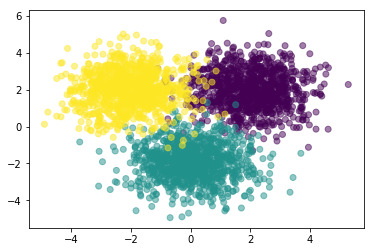

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.5)

In [5]:
Y = np.zeros((N,K))

In [9]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [6]:
for i in range(N):
    Y[i,y[i]] = 1

In [7]:
def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

In [23]:
def feed_forward(X, w1, b1, w2, b2):
    Z = np.tanh(X.dot(w1) + b1)
    return softmax(Z.dot(w2) + b2), Z

In [17]:
Y.shape

(3000, 3)

In [18]:
def cross_entropy(Y,p):
    return -np.sum(Y * np.log(p))

In [19]:
def classification_rate(Y,p):
    return np.mean(Y == p.argmax(axis = 1))

In [20]:
M = 5

w1 = np.random.randn(D,M)
b1 = np.random.randn(1,M)
w2 = np.random.randn(M,K)
b2 = np.random.randn(1,K)

In [24]:
J = []
eta = 0.0001
epochs = 1000

for t in range(N):
    P,Z = feed_forward(X, w1, b1, w2, b2)
    J.append(cross_entropy(Y,P))
    
    w2 -= eta * Z.T.dot(P-Y)
    b2 -= eta * (P-Y).sum(axis = 0)
    w1 -= eta * X.T.dot((P-Y).dot(w2.T)*(1-Z*Z))
    b1 -= eta * ((P-Y).dot(w2.T)*(1-Z*Z)).sum(axis=0)
    

    

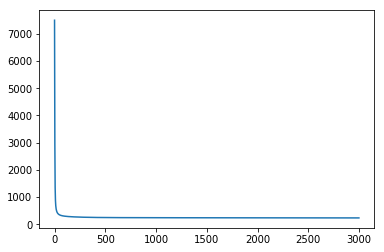

In [25]:
plt.plot(J)

In [27]:
print("Classification Rate:{}".format(classification_rate(y,P)))

Classification Rate:0.974


In [29]:
X_vis = np.random.uniform(-6,6,(24000,D))

In [34]:
P_vis, Z = feed_forward(X_vis, w1, b1, w2, b2)

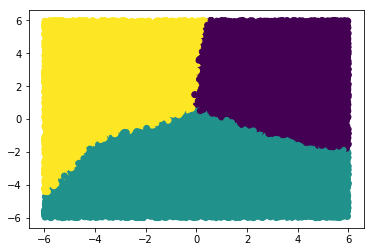

In [35]:
plt.scatter(X_vis[:,0], X_vis[:,1], c = P_vis.argmax(axis=1))